<h1> generate Nph,Ne and S1,S2 from Energy Spectrum or Array. for LZ </h1>

In [1]:
from __future__ import division
from LZlim_pyNEST import *
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<h3> run the code with a differential energy spectrum as the input. <br/>setup: title to save figure and file path to diff E spectrum , or list of energies </h3>

<h4> Options are file_path=
<ol>
<li>'data/PP_7Be_evt_ton_year_keV_lin_noDiscrim.txt'</li>
<li>'data/B8_DiffRate.txt'</li>
<li>'data/B8_Peter.txt'</li>
<li>'data/ATM_DiffRate.txt'</li>
<li>'data/atm_Peter.txt'</li>
<li>'data/HEP_DiffRate.txt'</li>
<li>'data/hep_Peter.txt'</li>
<li>'data/DSN_DiffRate.txt'</li>
<li>'data/CoherentNuSUM_DiffRate.txt'</li>
<li>'data/dru_er_cryoti_fidvol.txt' </li>
<li>'data/PP_7Be_evt_ton_year_keV_lin_noDiscrim.txt'</li>
<li>'data/PPsolarNu_Peter.txt'</li>
<li>'data/twovBB_evt_ton_year_keV_lin.txt'</li>
<li>'data/Kr85_beta_spectrum_LZ_fid.txt' </li>
<li>'data/Rn222_LZ_fid.txt'</li>
<li>'data/rate_nr_fidvol.txt'</li>
<li>'data/rate_er_fidvol.txt'</li>
</ol>
</h4>

total between 1.00 and 199.00 keV = 1.40141e-07 [evts/kg/day]
LZ exposure factor = 127423


//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


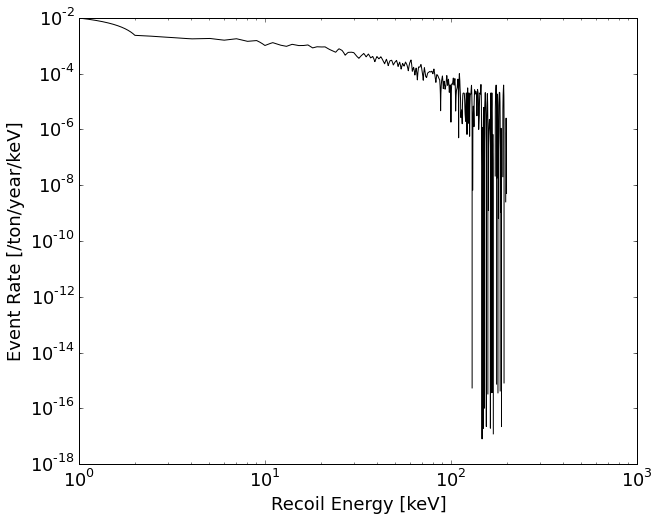

In [5]:
#setup (title to save figure, and file path to diff E spectrum , or list of energies)
title="rate_nr_fidvol" 
file_path='data/rate_nr_fidvol.txt'
ParticleType='NR' # ER or NR
##############################################################################
#Get S1 and S2 from differential spectrum
##############################################################################
#LZ
Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=1e5, minSpikePE=0.2)

#LUX
#Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=1e5, minSpikePE=0.2,e_lifetime=1000,dt0=160,f_drift=180,g1=0.117,SE_size=23.8,SE_res=5.8,eff_extract=0.51, kg_days=300*300)
#LUX params: e_lifetime=1000,dt0=160,f_drift=180,g1=0.117,SE_size=23.8,SE_res=5.8,eff_extract=0.51, kg_days=300*300

# Or use the following to convert energy array into S1,S2 with energy_array=>your energy array
#Nph, Ne, S1, S2 = E2NphNe(Energy =energy_array, ParticleType=ParticleType)

##############################################################################
#Generate Flat ER and NR spectra:
##############################################################################
#LZ
S1_bin_cen_n, mean_S2oS1_n, std_S2oS1_n, S1_bin_cen_e, mean_S2oS1_e, stdev_S2oS1_e, E_bin_cen_e, Eff_e, E_bin_cen_r, Eff_r = genBands()

#LUX
#S1_bin_cen_n, mean_S2oS1_n, std_S2oS1_n, S1_bin_cen_e, mean_S2oS1_e, stdev_S2oS1_e, E_bin_cen_e, Eff_e, E_bin_cen_r, Eff_r = genBands(e_lifetime=1000,dt0=160,f_drift=180,g1=0.117,SE_size=23.8,SE_res=5.8,eff_extract=0.51)

<h2> Make scatter plot in S2/S1 vs. S1 and calculate expected number of LZ WIMP like events</h2>

Total Simulated= 1e+05 
Nominal LZ exposoure factor 127422.8 
Number below NR mean in WS region= 24703 +/- 157
Number above NR mean in WS region= 15387 +/- 124
LZ nominal exposure BG in S1 region= 0.315 +/- 0.002
LZ nominal exposure BG in WS region= 0.194 +/- 0.001


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in true_divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: invalid value encountered in log10


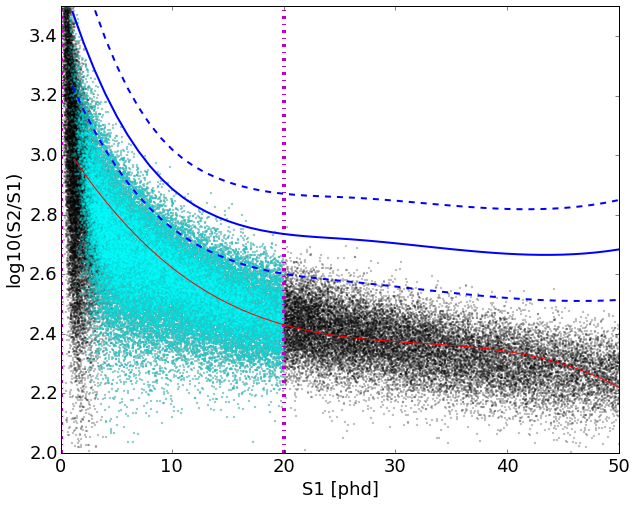

In [6]:
#plot WS region, and Calc expected count in WS region

#search below 50% NR mean and from 3 to 20 PE (1.5 to 6.5 keVee with g1=0.075)
S1_min=0
S1_max=20
S2raw_min=250 #about 5 electrons
NS1_coin_req=3
WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

plt.scatter(S1,log10(S2/S1),color='black',s=2,alpha=0.2)
plt.scatter(S1[WS_cut],log10(S2[WS_cut]/S1[WS_cut]),color='cyan',s=2,alpha=0.2)
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
plt.rcParams.update({'font.size': 18})
plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)

#plot NR mean, with a smooth spline, and calculate number of WS candidates
sNR = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n)
WS_under_NRmean= sum((log10(S2[WS_cut]/S1[WS_cut])<=sNR(S1[WS_cut])) ) 
WS_above_NRmean= sum((log10(S2[WS_cut]/S1[WS_cut])>sNR(S1[WS_cut])) )

plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r')

#plot ER band, with a smooth spline
s = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e, s=.1)
s_ub = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e+1.28*stdev_S2oS1_e, s=.1) #1.28 sigma for 10-90% bands
s_lb = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e-1.28*stdev_S2oS1_e, s=.1)
plot(S1_bin_cen_e,s(S1_bin_cen_e),'-b',linewidth=2)
plot(S1_bin_cen_e,s_ub(S1_bin_cen_e),'--b',linewidth=2)
plot(S1_bin_cen_e,s_lb(S1_bin_cen_e),'--b',linewidth=2)


xlim([0,50])
ylim([2.0,3.5])
savefig('figs/'+title+'.pdf')
savefig('figs/'+title+'.png')


print('Total Simulated= {:.1g} '.format(size(S1)))
print('Nominal LZ exposoure factor {:.1f} '.format(LZ_exposure_factor))
print('Number below NR mean in WS region= {:.0f} +/- {:.0f}'.format(WS_under_NRmean, sqrt(WS_under_NRmean)))
print('Number above NR mean in WS region= {:.0f} +/- {:.0f}'.format(WS_above_NRmean, sqrt(WS_above_NRmean)))
print('LZ nominal exposure BG in S1 region= {:.3f} +/- {:.3f}'.format((WS_above_NRmean+WS_under_NRmean)/LZ_exposure_factor, sqrt(WS_above_NRmean+WS_under_NRmean)/LZ_exposure_factor))
print('LZ nominal exposure BG in WS region= {:.3f} +/- {:.3f}'.format(WS_under_NRmean/LZ_exposure_factor, sqrt(WS_under_NRmean)/LZ_exposure_factor))

<h1> Plot Efficiency for ER and NR </h1>

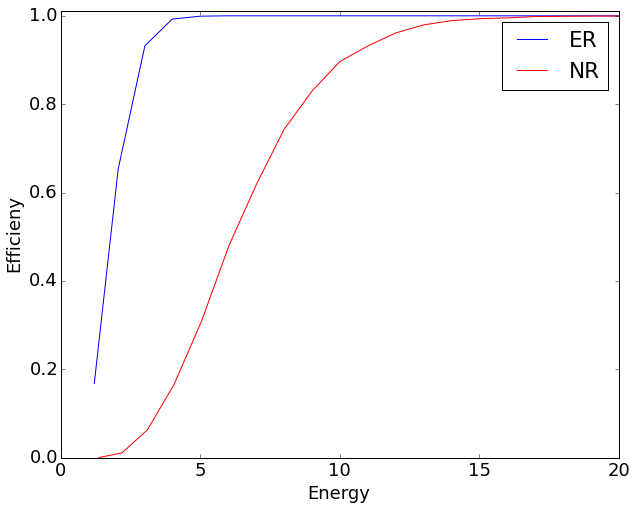

In [23]:
figure()
plot(E_bin_cen_e, Eff_e,'b')
plot(E_bin_cen_r, Eff_r,'r')
legend(['ER','NR'])
ylim([0,1.01])
xlim([0, 20])
xlabel('Energy [keV]')
ylabel('Efficieny')
savetxt('data/Eff.txt',np.vstack([E_bin_cen_e, Eff_e,E_bin_cen_r, Eff_r]).T)

<h1> Plot LY and QY curves </h1>

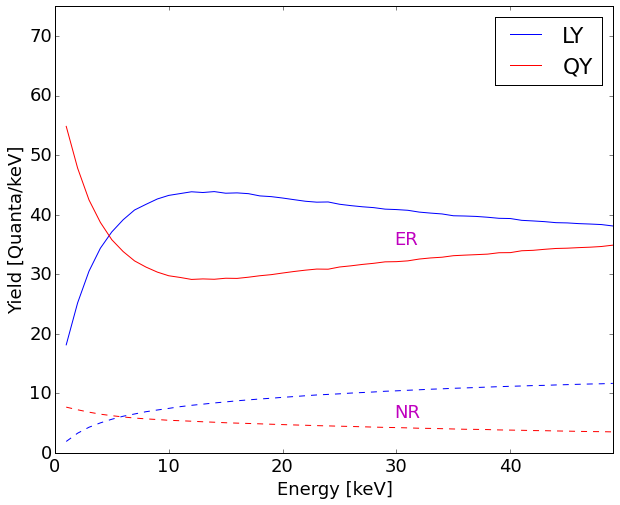

In [19]:
f_drift=700
E=[]
LYe=[]
QYe=[]
LYr=[]
QYr=[]

for Es in range(1,50):
    E.append(Es)
    Eee=Es*np.ones(5000)
    Nph, Ne = pn.Nph_Ne('ER',f_drift*np.ones_like(Eee),Eee)/Eee
    LYe.append(mean(Nph))
    QYe.append(mean(Ne))
    Nph, Ne = pn.Nph_Ne('NR',f_drift*np.ones_like(Eee),Eee)/Eee
    LYr.append(mean(Nph))
    QYr.append(mean(Ne))

figure()
plot(E, LYe,'b')
plot(E, QYe,'r')
plot(E,LYr,'--b')
plot(E,QYr,'--r')
legend(['LY','QY'])
ylim([0,75])
xlim([0, max(E)])
xlabel('Energy [keV]')
ylabel('Yield [Quanta/keV]')
plt.rcParams.update({'font.size': 18}) #set all fontsizes to 18

plt.text(30,35,'ER',fontsize=18,color='m')
plt.text(30,6,'NR',fontsize=18,color='m')

#savetxt('data/Eff.txt',np.vstack([E, LYe,QYe,LYr,QYr]).T)

In [ ]:
#make a denisty scatter plot
scatterColor(S1,log10(S2/S1))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
plt.rcParams.update({'font.size': 18})

In [9]:
#In case you need to load in the text file and change the units of the differential rate

#Edatatxt, rate=np.loadtxt('data/Kr85_beta_spectrum_LZ_fid.txt' ,skiprows=0,unpack=True)
#rate=rate*4
#np.savetxt('data/Kr85_beta_spectrum_LZ_fid.txt' ,np.vstack([Edatatxt, rate]).T)

<h1> overlay diff spectrum </h1>

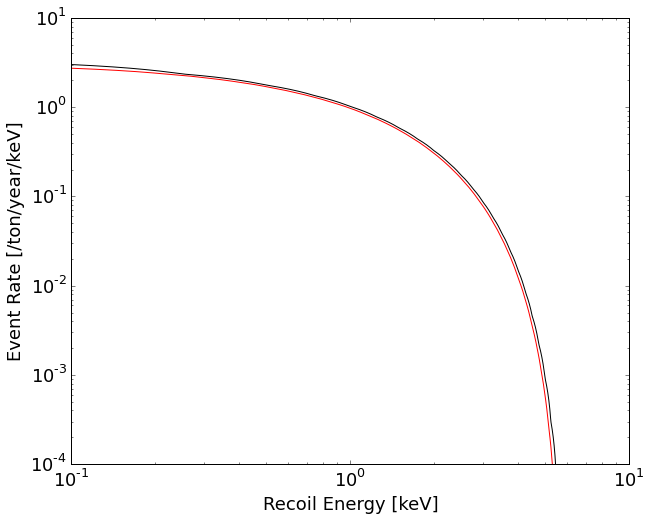

In [44]:
#file_path_1='data/B8_DiffRate.txt' 
#file_path_2='data/B8_Peter_lowE.txt'

#file_path_1='data/ATM_DiffRate.txt' 
#file_path_2='data/atm_Peter.txt'

file_path_1='data/HEP_DiffRate.txt' 
file_path_2='data/hep_Peter.txt'

Edatatxt_1, rate_1=np.loadtxt(file_path_1,skiprows=0,unpack=True) #evts/ton/year #Energy scale must be linear in text file for code to work properly!
Edata_1=np.arange(min(Edatatxt_1),max(Edatatxt_1),0.001)#0.01 keV binning
dR_1=np.interp(Edata_1,Edatatxt_1,rate_1)

Edatatxt_2, rate_2=np.loadtxt(file_path_2,skiprows=0,unpack=True) #evts/ton/year #Energy scale must be linear in text file for code to work properly!
Edata_2=np.arange(min(Edatatxt_2),max(Edatatxt_2),0.001)#0.01 keV binning
dR_2=np.interp(Edata_2,Edatatxt_2,rate_2)

plt.figure()
plt.loglog(Edata_1,dR_1,'-k')
plt.hold('on')
plt.loglog(Edata_2,dR_2,'-r')  
ylim([1e-4, 1e1])
xlim([.1, 1e1])
plt.xlabel('Recoil Energy [keV]')
plt.ylabel('Event Rate [/ton/year/keV]')
#text(1,0.013,'PP+7Be',fontsize=16)
plt.rcParams.update({'font.size': 18})

<h1> test flat NR </h1>

In [31]:
1/2

0.5

In [4]:
nSim=1e5
maxS1=50
f_drift=700
g1=0.075
SPE_res= 0.5
eff_extract=0.95
SE_size=50
SE_res=10
e_lifetime=1000
dt0=500
minSpikePE=0.25
min_NS1_coin=3
min_Ne_ext=5

#Calculate the ER band #################################
maxEe=100 #keVee, for flat ER spectrum
Flat_Ee = maxEe*st.uniform.rvs(size=nSim); #0-100 keVee
Nph, Ne= pn.Nph_Ne('ER',f_drift*np.ones_like(Flat_Ee),Flat_Ee)
S1_spike = st.binom.rvs(array(Nph, dtype=int64),g1) #binomial photon collection
NS1_coin=st.binom.rvs(S1_spike,1-math.erfc(((1-minSpikePE)/SPE_res)/sqrt(2))/2) #takes at least minSpikePE to produce a spike, use binomial probability calculated from erfc
S1 = st.norm.rvs(S1_spike,sqrt(S1_spike)*SPE_res,size=size(S1_spike)) #single PE resolution with sigma=sqrt(N)*sig_PE
Ne_ext = st.binom.rvs(array(Ne*exp(-dt0/e_lifetime), dtype=int64), eff_extract)
S2_raw = st.norm.rvs(Ne_ext*SE_size,sqrt(SE_res**2 * Ne_ext),size=size(Ne_ext))
S2 = S2_raw*exp(dt0/e_lifetime)/eff_extract
S1_bins=linspace(1,maxS1,maxS1)
S1_bins=linspace(1,maxS1,maxS1)
S1_bin_cen_e=empty_like(S1_bins)
mean_S2oS1_e=empty_like(S1_bins)
stdev_S2oS1_e=empty_like(S1_bins)
#Find the ER S2/S1 band at each S1
det_cuts= (NS1_coin>=min_NS1_coin) & (S2_raw>=min_Ne_ext*SE_size)
for index, S1s in enumerate(S1_bins):
    cut=det_cuts & inrange(S1,[S1s-0.5,S1s+0.5])
    S1_bin_cen_e[index]=mean(S1[cut])
    mean_S2oS1_e[index]=mean(log10(S2[cut]/S1[cut]))
    stdev_S2oS1_e[index]=std(log10(S2[cut]/S1[cut]))
S1e=S1
S2e=S2

#Calculate the NR band, and count below that for acceptance ########
maxEr=100 #keVnr, for flat spectrum... DD
Flat_Er = maxEr*st.uniform.rvs(size=nSim); #0-100 keVnr
Nph, Ne= pn.Nph_Ne('NR',f_drift*np.ones_like(Flat_Er),Flat_Er)
S1_spike = st.binom.rvs(array(Nph, dtype=int64),g1) #binomial photon collection
NS1_coin=st.binom.rvs(S1_spike,1-math.erfc(((1-minSpikePE)/SPE_res)/sqrt(2))/2) #takes at least minSpikePE to produce a spike, use binomial probability calculated from erfc
S1 = st.norm.rvs(S1_spike,sqrt(S1_spike)*SPE_res,size=size(S1_spike)) #single PE resolution with sigma=sqrt(N)*sig_PE
Ne_ext = st.binom.rvs(array(Ne*exp(-dt0/e_lifetime), dtype=int64), eff_extract)
S2_raw = st.norm.rvs(Ne_ext*SE_size,sqrt(SE_res**2 * Ne_ext),size=size(Ne_ext))
S2 = S2_raw*exp(dt0/e_lifetime)/eff_extract
S1_bins=linspace(1,maxS1,maxS1)
S1_bin_cen_n=empty_like(S1_bins)
mean_S2oS1_n=empty_like(S1_bins)
std_S2oS1_n=empty_like(S1_bins)
#Find the NR S2/S1 band at each S1
det_cuts= (NS1_coin>=min_NS1_coin) & (S2_raw>=min_Ne_ext*SE_size)
for index, S1s in enumerate(S1_bins):
    cut=det_cuts & inrange(S1,[S1s-0.5,S1s+0.5])
    S1_bin_cen_n[index]=mean(S1[cut])
    mean_S2oS1_n[index]=mean(S2[cut]/S1[cut])
    std_S2oS1_n[index]=std(S2[cut]/S1[cut])
        

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from IPython.kernel.zmq import kernelapp as app
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from IPython.kernel.zmq import kernelapp as app
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from IPython.kernel.zmq import kernelapp as app
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from IPython.kernel.zmq import kernelapp as app
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/an

(0, 50)

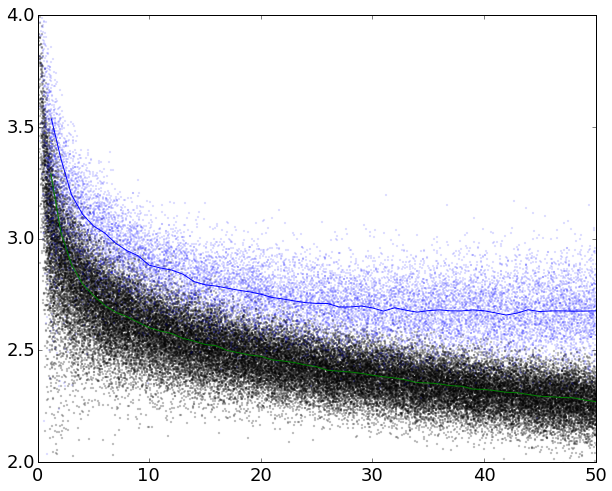

In [5]:
hold('on')
plt.scatter(S1,log10(S2/S1),color='black',s=2,alpha=0.2)
plt.scatter(S1e,log10(S2e/S1e),color='blue',s=2,alpha=0.1)
plot(S1_bin_cen_n,log10(mean_S2oS1_n),'-g')
plot(S1_bin_cen_e,mean_S2oS1_e,'-b')
ylim([2,4])
xlim([0,50])